In [19]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
%matplotlib inline

# Bank Customer Segmentation Analysis - Student Exercise

In this lab, you will implement customer segmentation using K-means clustering. You'll learn how to:
1. Preprocess data for clustering
2. Perform and visualize dimensionality reduction
3. Implement K-means clustering from scratch
4. Evaluate clustering results

Follow the instructions in each section and fill in the code where indicated.

In [20]:
# Load Data and Preprocess
def load_data(filepath):
    pass

#================ FOR PCA Dimensionality reduction =========
# Apply PCA for Dimensionality Reduction
def apply_pca(x, n_components):
    pass

#================ FOR K-Means ===============================
# Find Optimal Clusters for KMeans (Elbow Method) 
def find_optimal_clusters(x, max_clusters=10):
    pass

# Perform KMeans Clustering 
# Change None to the number of n_clusters value from the elbow method
def perform_kmeans_clustering(x, n_clusters=None):
    pass

#================ FOR Agglomerative ===============================
# Perform Agglomerative Clustering 
# Change None to the number of n_clusters value from the elbow method
def perform_agglomerative_clustering(x, n_clusters=None):
    pass

#================FOR Dendrogram===============================
# Get Linkages for Dendrogram
def get_linkages(x):
    pass

# Plot Dendrogram
def plot_dendrogram(linked):
    pass

## 1. Data Loading and Preprocessing

First, complete the data preprocessing function below. You need to:
1. Load the data
2. Handle categorical variables
3. Scale numerical features

In [21]:
def load_data(filepath):
    """Load and preprocess the bank marketing dataset.
    
    TODO:
    1. Load the CSV file (hint: it uses semicolon separator)
    2. Convert categorical columns to numerical using LabelEncoder
    3. Scale the features using StandardScaler
    """
    # Your code here:
    # Load data
    df = pd.read_csv(filepath, sep=';')  # TODO: Load CSV with correct separator
    
    # List of categorical columns to encode
    categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 
                       'loan', 'contact', 'month', 'poutcome', 'y']
    
    # TODO: Apply label encoding to categorical columns
    le = LabelEncoder()
    for col in categorical_cols:
        if col in df.columns:
            df[col] = le.fit_transform(df[col])
    
    # Select features for clustering
    features = ['age', 'balance', 'campaign', 'previous', 'job', 'education', 
               'housing', 'loan', 'default']
    X = df[features]  # TODO: Select features
    
    # TODO: Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)  # TODO: Apply StandardScaler
    
    return X_scaled, df

# Load and preprocess the data
X_scaled, data = load_data('bank-full.csv')
print("Data shape:", X_scaled.shape)
print("Features scaled successfully!")

Data shape: (45211, 9)
Features scaled successfully!


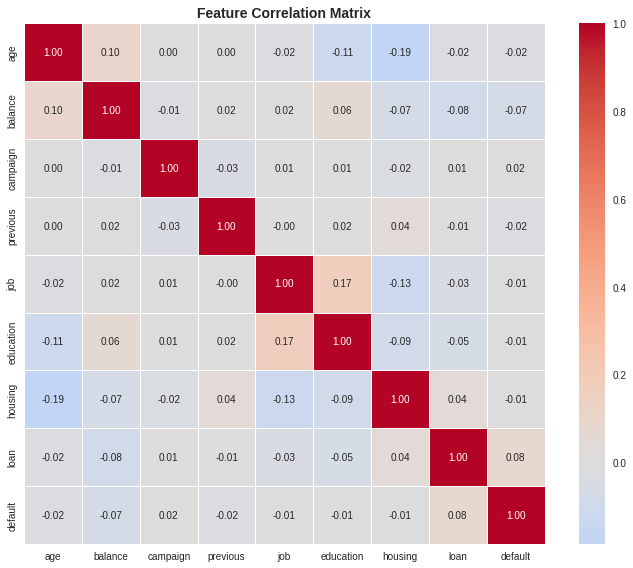

In [22]:
# Visualize correlation matrix
plt.figure(figsize=(10, 8))
features = ['age', 'balance', 'campaign', 'previous', 'job', 'education', 
           'housing', 'loan', 'default']
correlation_matrix = pd.DataFrame(X_scaled, columns=features).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, fmt='.2f')
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [23]:
class KMeansClustering:
    """Minimal K-means skeleton for students to implement.

    Students should implement the core methods below:
    - _initialize_centroids
    - _assign_clusters
    - _update_centroids
    - fit

    Keep implementations simple and readable; tests and visualization code will
    use these methods once implemented.
    """
    def __init__(self, n_clusters=3, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def _initialize_centroids(self, X):
        """Initialize centroids.

        TODO (student):
        - Randomly select `n_clusters` distinct points from X as initial centroids.
        - Return an array of shape (n_clusters, n_features).
        Hint: Use np.random.choice to pick indices.
        """
        np.random.seed(self.random_state)
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        centroids = X[random_indices]
        return centroids

    def _assign_clusters(self, X):
        """Assign each sample in X to the nearest centroid.

        TODO (student):
        - Compute distance from each point to each centroid (Euclidean)
        - Return an integer array of shape (n_samples,) with cluster labels
        Hint: np.linalg.norm with axis manipulation or broadcasting helps here.
        """
        distances = np.zeros((X.shape[0], self.n_clusters))
        for i in range(self.n_clusters):
            distances[:, i] = np.linalg.norm(X - self.centroids[i], axis=1)
        labels = np.argmin(distances, axis=1)
        return labels

    def _update_centroids(self, X, labels):
        """Recompute centroids as the mean of points assigned to each cluster.

        TODO (student):
        - For each cluster id in 0..n_clusters-1 compute the mean of points
          assigned to that cluster. If a cluster has no points, consider reinitializing
          its centroid (or leave unchanged) — discuss in your report.
        - Return an array of shape (n_clusters, n_features).
        """
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                centroids[i] = cluster_points.mean(axis=0)
            else:
                # If cluster is empty, keep the old centroid
                centroids[i] = self.centroids[i]
        return centroids

    def fit(self, X):
        """Run K-means until convergence or max_iters.

        TODO (student):
        - Initialize centroids
        - Loop: assign clusters, update centroids
        - Stop early if centroids do not change (or change below a tiny threshold)
        - Store final labels in self.labels and centroids in self.centroids
        - Return self
        """
        self.centroids = self._initialize_centroids(X)
        
        for iteration in range(self.max_iters):
            # Assign clusters
            old_centroids = self.centroids.copy()
            self.labels = self._assign_clusters(X)
            
            # Update centroids
            self.centroids = self._update_centroids(X, self.labels)
            
            # Check convergence
            if np.allclose(old_centroids, self.centroids, atol=1e-6):
                print(f"Converged at iteration {iteration}")
                break
        
        return self

    def predict(self, X):
        """Assign cluster labels to X using the learned centroids.

        Implementation may call _assign_clusters but should error if centroids
        are not yet initialized (i.e., if fit wasn't called).
        """
        if self.centroids is None:
            raise ValueError("Model has not been fitted yet. Call fit(X) first.")
        return self._assign_clusters(X)


## 2. Dimensionality Reduction

Before clustering, we often reduce the dimensionality of our data for better visualization and performance. Implement PCA below:

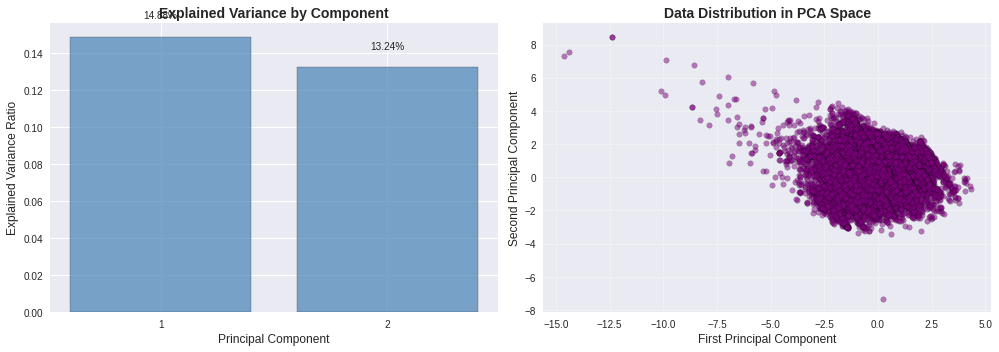


PCA Results:
Total variance explained by 2 components: 28.12%
Shape after PCA: (45211, 2)


In [24]:
def apply_pca(X, n_components=2):
    """Apply PCA for dimensionality reduction.
    
    TODO:
    1. Initialize and fit PCA
    2. Transform the data
    3. Create visualizations to understand:
       - Explained variance ratio
       - Cumulative explained variance
       - Data distribution in 2D
    """
    # Your code here:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    
    # TODO: Create visualization
    plt.figure(figsize=(14, 5))
    
    # Plot explained variance
    # Your code here
    plt.subplot(1, 2, 1)
    explained_var = pca.explained_variance_ratio_
    components = range(1, len(explained_var) + 1)
    plt.bar(components, explained_var, alpha=0.7, color='steelblue', edgecolor='black')
    plt.xlabel('Principal Component', fontsize=12)
    plt.ylabel('Explained Variance Ratio', fontsize=12)
    plt.title('Explained Variance by Component', fontsize=14, fontweight='bold')
    plt.xticks(components)
    for i, v in enumerate(explained_var):
        plt.text(i + 1, v + 0.01, f'{v:.2%}', ha='center', fontsize=10)
    
    # Plot data in 2D
    # Your code here
    plt.subplot(1, 2, 2)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, s=30, c='purple', edgecolor='k', linewidth=0.3)
    plt.xlabel('First Principal Component', fontsize=12)
    plt.ylabel('Second Principal Component', fontsize=12)
    plt.title('Data Distribution in PCA Space', fontsize=14, fontweight='bold')
    plt.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nPCA Results:")
    print(f"Total variance explained by {n_components} components: {sum(explained_var):.2%}")
    
    return X_pca

# Apply PCA
X_pca = apply_pca(X_scaled)
print("Shape after PCA:", X_pca.shape)

## 3. Clustering Evaluation

Implement functions to evaluate the quality of your clustering results:

Finding optimal clusters...
Converged at iteration 31
k=2: Inertia=75892.03, Silhouette=0.331
Converged at iteration 26
k=3: Inertia=48179.64, Silhouette=0.387
Converged at iteration 24
k=4: Inertia=38059.02, Silhouette=0.358
Converged at iteration 33
k=5: Inertia=31800.29, Silhouette=0.349
Converged at iteration 23
k=6: Inertia=27188.82, Silhouette=0.367
Converged at iteration 98
k=7: Inertia=23384.33, Silhouette=0.372
Converged at iteration 34
k=8: Inertia=20709.54, Silhouette=0.375
Converged at iteration 69
k=9: Inertia=19113.00, Silhouette=0.369
Converged at iteration 68
k=10: Inertia=17985.76, Silhouette=0.345


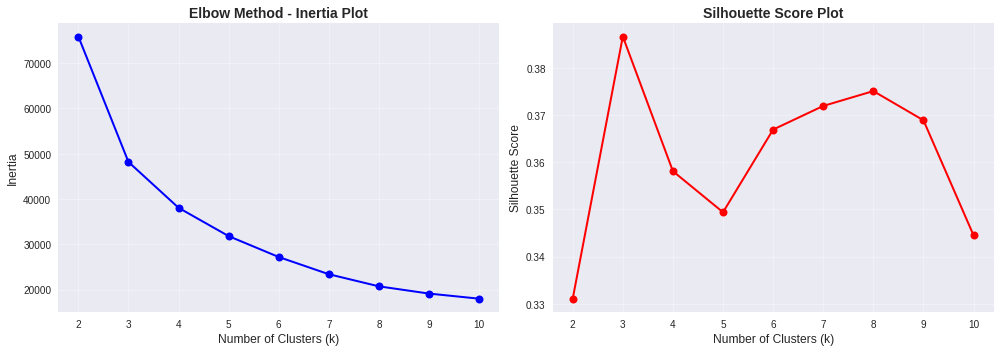

In [25]:
def calculate_inertia(X, labels, centroids):
    """Calculate the within-cluster sum of squares (inertia).
    
    TODO:
    1. For each cluster, calculate the sum of squared distances
       between points and their centroid
    2. Sum up all cluster distances
    """
    # Your code here
    inertia = 0
    # Calculate distances between points and their assigned centroids
    for i in range(len(centroids)):
        cluster_points = X[labels == i]
        if len(cluster_points) > 0:
            distances = np.linalg.norm(cluster_points - centroids[i], axis=1)
            inertia += np.sum(distances ** 2)
    return inertia

def plot_elbow_curve(X, max_k=10):
    """Plot the elbow curve to find optimal number of clusters.
    
    TODO:
    1. Try different values of k (1 to max_k)
    2. Calculate inertia for each k
    3. Plot k vs inertia
    4. Help identify the 'elbow' point
    """
    # Your code here
    inertias = []
    silhouette_scores = []
    K = range(2, max_k + 1)  # Start from 2 for silhouette score
    
    # Calculate inertia for different k values
    # Your code here
    print("Finding optimal clusters...")
    for k in K:
        kmeans_temp = KMeansClustering(n_clusters=k, random_state=42)
        kmeans_temp.fit(X)
        inertia = calculate_inertia(X, kmeans_temp.labels, kmeans_temp.centroids)
        inertias.append(inertia)
        
        # Calculate silhouette score
        sil_score = silhouette_score(X, kmeans_temp.labels)
        silhouette_scores.append(sil_score)
        print(f"k={k}: Inertia={inertia:.2f}, Silhouette={sil_score:.3f}")
    
    # Create elbow plot
    # Your code here
    plt.figure(figsize=(14, 5))
    
    # Inertia plot
    plt.subplot(1, 2, 1)
    plt.plot(K, inertias, 'bo-', linewidth=2, markersize=8)
    plt.xlabel('Number of Clusters (k)', fontsize=12)
    plt.ylabel('Inertia', fontsize=12)
    plt.title('Elbow Method - Inertia Plot', fontsize=14, fontweight='bold')
    plt.grid(alpha=0.3)
    plt.xticks(K)
    
    # Silhouette score plot
    plt.subplot(1, 2, 2)
    plt.plot(K, silhouette_scores, 'ro-', linewidth=2, markersize=8)
    plt.xlabel('Number of Clusters (k)', fontsize=12)
    plt.ylabel('Silhouette Score', fontsize=12)
    plt.title('Silhouette Score Plot', fontsize=14, fontweight='bold')
    plt.grid(alpha=0.3)
    plt.xticks(K)
    
    plt.tight_layout()
    plt.show()
    
    return inertias

# Try different numbers of clusters
inertias = plot_elbow_curve(X_pca)

Converged at iteration 26


/tmp/ipykernel_5329/3506206789.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(cluster_silhouette_data, labels=unique_labels, patch_artist=True)


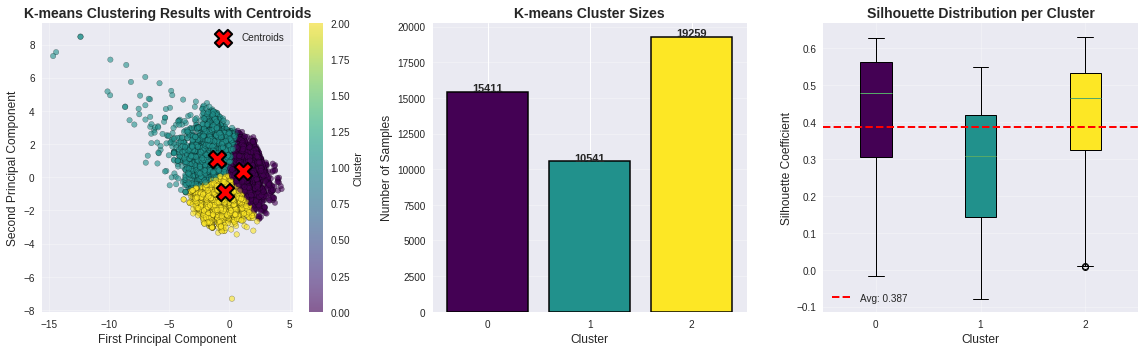


CLUSTERING EVALUATION METRICS
Number of Clusters: 3
Inertia: 48179.64
Silhouette Score: 0.387


In [26]:
# Apply final clustering with optimal k (based on elbow curve, typically k=3)
optimal_k = 3  # Change this based on your elbow curve analysis
kmeans = KMeansClustering(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_pca)

# Visualize final results
plt.figure(figsize=(16, 5))

# Plot 1: Clusters with centroids
plt.subplot(1, 3, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels, 
                     cmap='viridis', alpha=0.6, s=30, edgecolor='k', linewidth=0.3)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], 
            c='red', marker='X', s=300, label='Centroids', edgecolor='black', linewidth=2)
plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)
plt.title('K-means Clustering Results with Centroids', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.grid(alpha=0.3)

# Plot 2: Cluster sizes
plt.subplot(1, 3, 2)
unique_labels, counts = np.unique(kmeans.labels, return_counts=True)
colors_bar = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))
bars = plt.bar(unique_labels, counts, color=colors_bar, edgecolor='black', linewidth=1.5)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.title('K-means Cluster Sizes', fontsize=14, fontweight='bold')
plt.xticks(unique_labels)
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
             str(count), ha='center', fontsize=11, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Plot 3: Silhouette distribution per cluster
plt.subplot(1, 3, 3)
from sklearn.metrics import silhouette_samples
silhouette_vals = silhouette_samples(X_pca, kmeans.labels)
cluster_silhouette_data = [silhouette_vals[kmeans.labels == i] for i in unique_labels]
bp = plt.boxplot(cluster_silhouette_data, labels=unique_labels, patch_artist=True)
for patch, color in zip(bp['boxes'], colors_bar):
    patch.set_facecolor(color)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Silhouette Coefficient', fontsize=12)
plt.title('Silhouette Distribution per Cluster', fontsize=14, fontweight='bold')
plt.axhline(y=silhouette_score(X_pca, kmeans.labels), color='r', 
            linestyle='--', linewidth=2, label=f'Avg: {silhouette_score(X_pca, kmeans.labels):.3f}')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate and print evaluation metrics
inertia = calculate_inertia(X_pca, kmeans.labels, kmeans.centroids)
silhouette = silhouette_score(X_pca, kmeans.labels)

print("\n" + "="*60)
print("CLUSTERING EVALUATION METRICS")
print("="*60)
print(f"Number of Clusters: {optimal_k}")
print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {silhouette:.3f}")
print("="*60)


## 4. Recursive Bisecting K-means (Student exercise)

This is an optional exercise for students who want to explore a hierarchical variant of K-means.

Task: implement a concise bisecting K-means procedure that recursively splits clusters into two until a target number of clusters is reached.

Learning goals:
- Understand how repeated binary splits can form a hierarchical clustering
- Practice applying K-means on subclusters and tracking labels/centroids

Hints:
- You can use sklearn's KMeans(k=2) for the binary split step, or reuse your `KMeansClustering` implementation.
- Keep label bookkeeping simple: use increasing integer labels for new clusters.
- Store split metadata (parent -> left/right) to enable a tree visualization later.


RECURSIVE BISECTING K-MEANS


/tmp/ipykernel_5329/863759548.py:112: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(cluster_silhouette_data_bisect, labels=unique_labels_bisect, patch_artist=True)


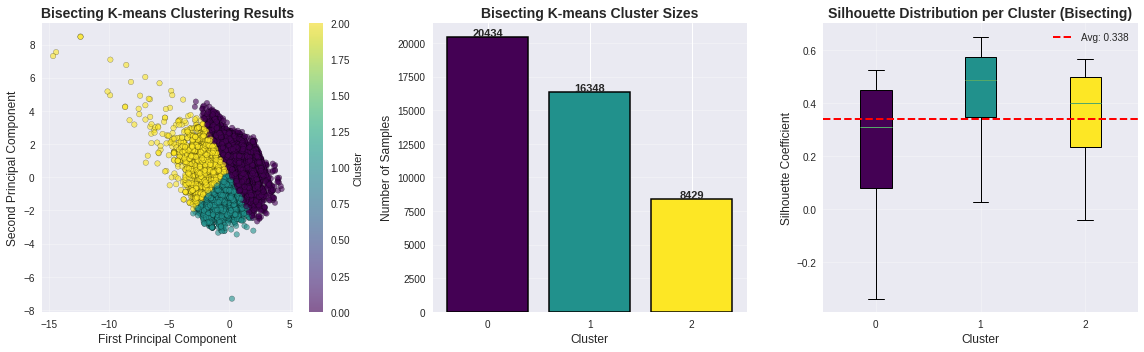


Bisecting K-means Results:
Number of Clusters: 3
Silhouette Score: 0.338


In [27]:
from sklearn.cluster import KMeans
class BisectingKMeans:
    """Concise skeleton for students to implement a bisecting K-means algorithm.

    Students should implement `fit_predict` to recursively split clusters until
    `n_clusters` is reached.
    """
    def __init__(self, n_clusters, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.labels_ = None
        # Optional: store mapping parent -> (left_label, right_label)
        self.split_tree = {}
        # Optional: store centroids per cluster id
        self.centers_ = {}

    def fit_predict(self, X):
        """Recursively bisect clusters until `n_clusters` is reached.

        TODO (student):
        - Start with all points assigned to label 0.
        - While number of unique labels < n_clusters:
            - Select a cluster to split (e.g., the largest cluster by size)
            - Run a binary KMeans (k=2) on the points in that cluster
            - Assign new labels (keep one child label as the original, give the other a new id)
            - Record parent -> (left, right) in `self.split_tree` and centroids in `self.centers_`
        - Set and return `self.labels_` (numpy array of length n_samples)

        Hints:
        - Use sklearn.cluster.KMeans(n_clusters=2, random_state=self.random_state) for the split step
        - Keep a counter for new label ids and increment when creating a new cluster
        - Use boolean indexing to operate on subsets of X efficiently
        """
        # Start with all points in cluster 0
        self.labels_ = np.zeros(X.shape[0], dtype=int)
        next_label = 1
        
        # Continue splitting until we have n_clusters
        while len(np.unique(self.labels_)) < self.n_clusters:
            # Find the largest cluster to split
            unique_labels, counts = np.unique(self.labels_, return_counts=True)
            largest_cluster = unique_labels[np.argmax(counts)]
            
            # Get points in the largest cluster
            cluster_mask = self.labels_ == largest_cluster
            cluster_points = X[cluster_mask]
            
            # Split this cluster into 2 using K-means
            kmeans_split = KMeans(n_clusters=2, random_state=self.random_state, n_init=10)
            split_labels = kmeans_split.fit_predict(cluster_points)
            
            # Assign new labels
            # Keep label for points assigned to cluster 0, assign new label to cluster 1
            new_labels = self.labels_.copy()
            cluster_indices = np.where(cluster_mask)[0]
            
            for i, split_label in enumerate(split_labels):
                if split_label == 1:
                    new_labels[cluster_indices[i]] = next_label
            
            # Store the split in the tree
            self.split_tree[largest_cluster] = (largest_cluster, next_label)
            
            # Store centroids
            self.centers_[largest_cluster] = kmeans_split.cluster_centers_[0]
            self.centers_[next_label] = kmeans_split.cluster_centers_[1]
            
            # Update labels
            self.labels_ = new_labels
            next_label += 1
        
        return self.labels_

# Apply Bisecting K-means
print("\n" + "="*60)
print("RECURSIVE BISECTING K-MEANS")
print("="*60)
bisect_kmeans = BisectingKMeans(n_clusters=optimal_k, random_state=42)
bisect_labels = bisect_kmeans.fit_predict(X_pca)

# Visualize Bisecting K-means results
plt.figure(figsize=(16, 5))

# Plot 1: Clusters
plt.subplot(1, 3, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=bisect_labels, 
                     cmap='viridis', alpha=0.6, s=30, edgecolor='k', linewidth=0.3)
plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)
plt.title('Bisecting K-means Clustering Results', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Cluster')
plt.grid(alpha=0.3)

# Plot 2: Cluster sizes
plt.subplot(1, 3, 2)
unique_labels_bisect, counts_bisect = np.unique(bisect_labels, return_counts=True)
colors_bar = plt.cm.viridis(np.linspace(0, 1, len(unique_labels_bisect)))
bars = plt.bar(unique_labels_bisect, counts_bisect, color=colors_bar, edgecolor='black', linewidth=1.5)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.title('Bisecting K-means Cluster Sizes', fontsize=14, fontweight='bold')
plt.xticks(unique_labels_bisect)
for bar, count in zip(bars, counts_bisect):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
             str(count), ha='center', fontsize=11, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Plot 3: Silhouette distribution
plt.subplot(1, 3, 3)
silhouette_vals_bisect = silhouette_samples(X_pca, bisect_labels)
cluster_silhouette_data_bisect = [silhouette_vals_bisect[bisect_labels == i] for i in unique_labels_bisect]
bp = plt.boxplot(cluster_silhouette_data_bisect, labels=unique_labels_bisect, patch_artist=True)
for patch, color in zip(bp['boxes'], colors_bar):
    patch.set_facecolor(color)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Silhouette Coefficient', fontsize=12)
plt.title('Silhouette Distribution per Cluster (Bisecting)', fontsize=14, fontweight='bold')
bisect_silhouette = silhouette_score(X_pca, bisect_labels)
plt.axhline(y=bisect_silhouette, color='r', linestyle='--', 
            linewidth=2, label=f'Avg: {bisect_silhouette:.3f}')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate metrics for Bisecting K-means
bisect_silhouette_score = silhouette_score(X_pca, bisect_labels)

print(f"\nBisecting K-means Results:")
print(f"Number of Clusters: {optimal_k}")
print(f"Silhouette Score: {bisect_silhouette_score:.3f}")
print("="*60)



In [28]:
print("\n" + "="*60)
print("ALGORITHM COMPARISON")
print("="*60)
print(f"\nK-means Silhouette Score: {silhouette:.3f}")
print(f"Bisecting K-means Silhouette Score: {bisect_silhouette_score:.3f}")
print(f"\nBetter Algorithm: {'K-means' if silhouette > bisect_silhouette_score else 'Bisecting K-means'}")
print("="*60)


ALGORITHM COMPARISON

K-means Silhouette Score: 0.387
Bisecting K-means Silhouette Score: 0.338

Better Algorithm: K-means


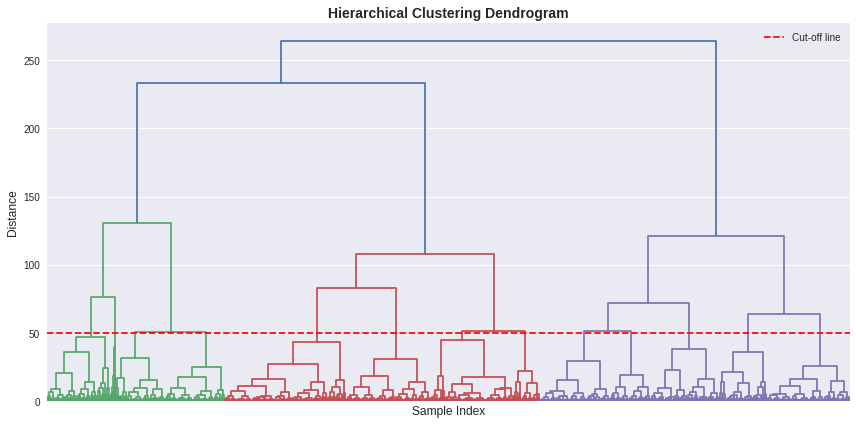

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage
def get_linkages(X):
    """Get linkages for hierarchical clustering dendrogram."""
    linked = linkage(X, method='ward')
    return linked

def plot_dendrogram(linked):
    """Plot hierarchical clustering dendrogram."""
    plt.figure(figsize=(12, 6))
    dendrogram(linked, 
               orientation='top',
               distance_sort='descending',
               show_leaf_counts=True,
               no_labels=True)
    plt.title('Hierarchical Clustering Dendrogram', fontsize=14, fontweight='bold')
    plt.xlabel('Sample Index', fontsize=12)
    plt.ylabel('Distance', fontsize=12)
    plt.axhline(y=50, color='r', linestyle='--', label='Cut-off line')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Optional: Create dendrogram
linked = get_linkages(X_pca)
plot_dendrogram(linked)



## Bonus Challenges

If you've completed the main tasks, try these extensions:

1. Implement k-means++ initialization
   - Instead of random initialization, use the k-means++ algorithm
   - This should give better and more consistent results

2. Add cluster interpretation
   - Analyze the characteristics of each cluster
   - What features distinguish one cluster from another?
   - Create visualizations to show cluster properties

3. Try different distance metrics
   - Implement Manhattan distance instead of Euclidean
   - Compare the clustering results

4. Add outlier detection
   - Identify points far from all centroids
   - How might you handle these outliers?

Remember to document your code and explain your findings!